# Project: Investigate a Dataset - TMDb_Movie_data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project I will explore the dataset of the TMDb Movies which contains information of aproximatly 10,000 movies that were realesed between 1960 until 2015. This dataset provides the follow information:
<ul>
<li>id                      : Is the code that identifies the movie</li>
<li>imdb_id                 : Is the code that identifies the movie in TMDb</li>
<li>popularity              : Is the popularity rate of the movie</li>
<li>budget                  : Is the budget of each movie</li>
<li>revenue                 : Is the revenue of each movie</li>
<li>original_title          : Is the original title of each movie</li>
<li>cast                    : Is the principal cast of each movie</li>
<li>homepage                : Is the link of the landing page each movie</li>
<li>director                : Is the name of the director of the movie</li>
<li>tagline                 : Is the tag line after the name of the movie</li>
<li>keywords                : Are the keywords related to the movie</li>
<li>overview                : Is a quick snapshot of the movie</li>
<li>runtime                 : Is the duration of the movie</li>
<li>genres                  : Are the genres related to the movie</li>
<li>production_companies    : Is the name of the company that made the production</li>
<li>release_date            : Is the date when it was released.</li>
<li>release_year            : Is the year of the release </li>
<li>budget_adj              : Is the bugdet adjusted to the inflation of 2010</li>
<li>revenue_adj             : Is the revenue adjusted to the inflation of 2010</li>
<li>vote_count              : A number related to the movie. I would ask for more information about this column</li>
<li>vote_average            : A number related to the movie. I would ask for more information about this column</li>
</ul>

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. The instructions say: "Don’t worry about cleaning them. You can leave them as is".

### During this analysis I will answer the follow questions:

<ul>
<li><a href="#q1">Research Question 1: Which genres are most popular from year to year?</a></li>
<li><a href="#q2">Research Question 2: What kinds of properties are associated with movies that have high revenues?</a></li>
</ul>


In [1]:
# Let's start the project, first I will call the packages that will be needed in the project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
!pip install tensorflow

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("tmdb-movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

In [6]:
#Drop the columns of 'imdb_id','homepage','tagline','overview','cast','director','keywords','production_companies' because they won't be use in the analysis
df.drop(['imdb_id','homepage','tagline','overview','cast','director','keywords','production_companies'],axis=1, inplace=True)
#Let´s see what columns have nulls 
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [7]:
#drop the movies with null genres
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 13 columns):
id                10843 non-null int64
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


In [8]:
#The columns "genres" have diferent types of information in each cell so I´m going to divide them

df=(df.set_index(['id', 'popularity','budget','revenue','original_title','runtime','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj'])
   .apply(lambda x: x.str.split('|').explode())
   .reset_index())

In [9]:
#built a new column call Profit. Where Profit is revenue minus budget
df['profit'] = df['revenue'] - df['budget']
df.loc[df['profit'] < 0, 'profit'] = 0

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1: Which genres are most popular from year to year?

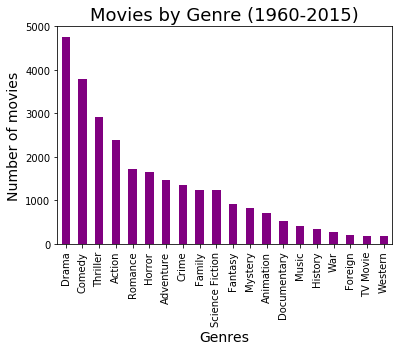

In [10]:
#I'm going to plot the comparisson between genres and popularity
df['genres'].value_counts().plot(kind='bar', color='purple');
plt.title('Movies by Genre (1960-2015)', size=18)
plt.xlabel('Genres', size=14)
plt.ylabel('Number of movies', size=14);

>In the plot Movies by Genre (1960 -2015) we can see the numbers of the movies per genre. The genre with the highest number of movies is drama.

#### Release_year, Genres and number of movies

In [11]:
#I'm going to group the number of movies per year and genre in order to find which one is the most popular over the years.
genres_year = df.groupby(['release_year'])['genres'].value_counts()
genres_year.groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

release_year  genres  
1960          Drama        13
              Action        8
              Comedy        8
1961          Drama        16
              Comedy       10
                         ... 
2014          Comedy      185
              Thriller    179
2015          Drama       260
              Thriller    171
              Comedy      162
Name: genres, Length: 168, dtype: int64

#### The first question of this analysis is "Which genres are most popular from year to year?" and we can see that the first is Drama over the years. In second place comes Comedy and in third place we find Thriller.

<a id='q2'></a>
### Research Question 2: What kinds of properties are associated with movies that have high revenues?

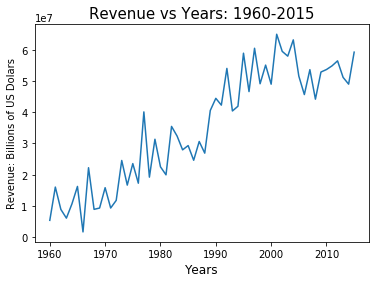

In [12]:
#I'm going to see the progression of the revenue of movies over the years.
revenue = df.groupby('release_year')['revenue'].mean()
plt.plot(revenue)
plt.title('Revenue vs Years: 1960-2015', size=15)
plt.xlabel('Years', size=12)
plt.ylabel('Revenue: Billions of US Dolars', size=10);

#### As we can see he revenue has been increasing over the years

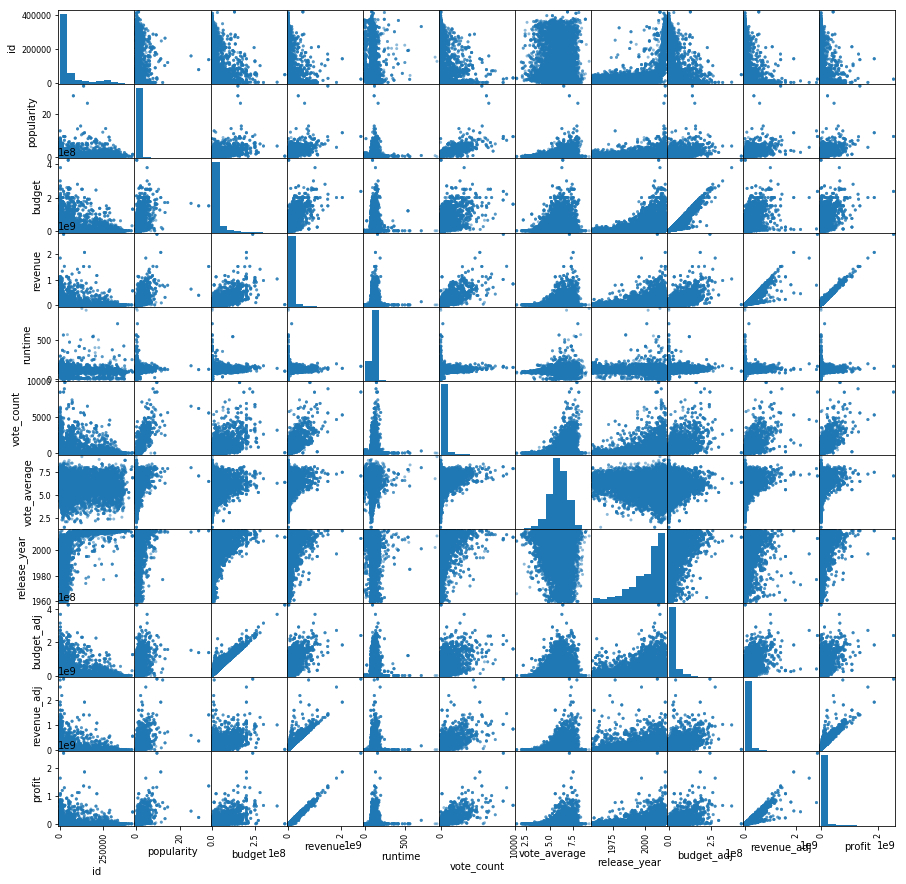

In [13]:
#I'm going to see the correlations between the variables
pd.plotting.scatter_matrix(df,figsize=(15,15));


#### The properties that are positively  associated with movies the revenues are popularity, budget and vote_count

In [14]:
#I'm going to find the top 10% of the films with higher revenue, they are aprox the first 110 titles
df_top_1 = df.sort_values(by=['revenue'], ascending=False).head(350)
df_top_1['original_title'].nunique()

110

In [15]:
df_top_1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,350.000000,350.000000,3.500000e+02,3.500000e+02,350.000000,350.000000,350.000000,350.000000,3.500000e+02,3.500000e+02,3.500000e+02
mean,45231.771429,5.142051,1.519029e+08,8.818254e+08,127.808571,3450.408571,6.902286,2008.034286,1.546195e+08,9.452623e+08,7.299225e+08
std,58908.968940,4.485296,6.507174e+07,3.318735e+08,25.058909,1894.611293,0.665090,6.722836,6.095824e+07,4.079620e+08,3.203832e+08
min,11.000000,0.436803,1.050000e+07,5.860907e+08,88.000000,201.000000,5.600000,1977.000000,2.372625e+07,5.477497e+08,3.317949e+08
25%,750.500000,2.764535,1.085000e+08,6.912107e+08,104.500000,2099.500000,6.400000,2005.000000,1.141091e+08,6.927528e+08,5.435596e+08
50%,12445.000000,4.029240,1.500000e+08,7.886798e+08,130.000000,3087.000000,7.000000,2010.000000,1.565855e+08,8.331582e+08,6.389582e+08
75%,80321.000000,6.052479,2.000000e+08,9.543059e+08,143.000000,4269.000000,7.400000,2013.000000,1.873655e+08,1.061904e+09,7.882127e+08
max,286217.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.100000,2015.000000,3.683713e+08,2.827124e+09,2.544506e+09


In [16]:
below_1 = df.query('revenue < 5.860907e+08')
top_1 = df.query('revenue >= 5.860907e+08')

Adventure          80
Action             58
Fantasy            42
Science Fiction    36
Family             35
Name: genres, dtype: int64


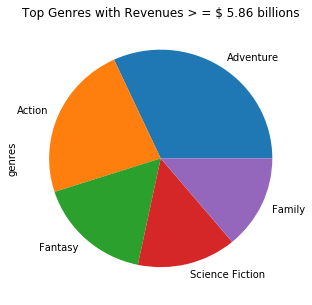

In [17]:
print(top_1['genres'].value_counts().nlargest(5))
top_1['genres'].value_counts().nlargest(5).plot(kind='pie',figsize=(5,5), title= "Top Genres with Revenues > = $ 5.86 billions");

#### The genres with higher revenues are Adventures, Action, Fantasy, Science Fiction and Family. Even though Drama is the one with more movies over the years.

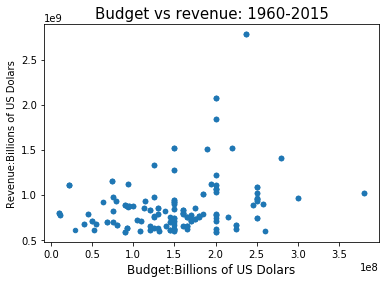

In [18]:
#I'm going to whatch the relation of the budget vs the revenue for the top 1% of the movies.
top_1.plot(x='budget', y='revenue', kind='scatter');
plt.title('Budget vs revenue: 1960-2015', size=15)
plt.xlabel('Budget:Billions of US Dolars', size=12)
plt.ylabel('Revenue:Billions of US Dolars', size=10);

#### There correlation between the budget and the revenue is not clear, so we can't get a clear conclusion between this variables.

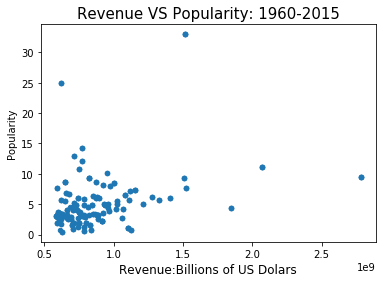

In [19]:
#I'm going to whatch the relation of the Revenue vs the Popularity for the top 10 % of the movies.
top_1.plot(x='revenue', y='popularity', kind='scatter');
plt.title('Revenue VS Popularity: 1960-2015', size=15)
plt.xlabel('Revenue:Billions of US Dolars', size=12)
plt.ylabel('Popularity', size=10);

#### The relation between the revenue and the popularity is postive. The movies with more revenue tend to have more popularity and viceversa.

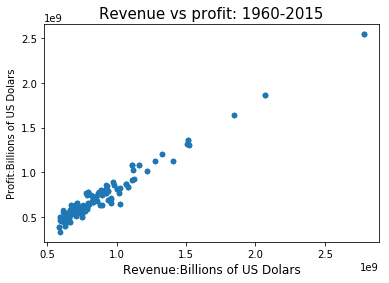

In [20]:
#I'm going to whatch the relation of the Revenue vs the Profit for the top 10 % of the movies.
top_1.plot(x='revenue', y='profit', kind='scatter');
plt.title('Revenue vs profit: 1960-2015', size=15)
plt.xlabel('Revenue:Billions of US Dolars', size=12)
plt.ylabel('Profit:Billions of US Dolars', size=10);

#### The relation between the revenue and the profit is postive. The movies with more revenue tend to have more profit and viceversa.

<a id='conclusions'></a>
## Conclusions

 > **1.** The genre that is more popular over the years is Drama, in the second place is Comedy and in the third is Thriller.
 
 > **2.** The revenue has been increasing over the years. This industry is growing.
 
 > **3.** The movies with higher revenues are profitable
 
 > **4.** The genre with higher revenues are Adventure.

### Limitations

I couldn't find the usability of the data of votes because I didn't find so much reference about it. Maybe it has any relationship with the popularity but I have to dig deeper on that.

The data of revenue_adj was adjusted to the inflation of 2010 however we are in the year 2021 so I think that if we want to use a adjusted ammount we should use the inflation of 2015 or the current year. 

For the second question I picked the top 1% of the movies in order to analyze the movies with higher revenues.


In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0